In [1]:
from matplotlib.patches import Polygon

In [2]:
p301 = pd.read_pickle('./providence/data/swe_stats.pcl')
vcm = pd.read_pickle('./jemez/data/vcm_swe_stats.pcl')
nwt = pd.read_pickle('./data/niwot_stats.pcl')

In [3]:
nwt.reset_index(inplace=True)

In [4]:
nwt.columns = ['wateryear','averageMR','peakswe','dopeakswe','dosnowfree','doaccum','P',
              'dowy_peakswe','dowy_snowfree','dowy_accum']

In [5]:
nwt.head()

,wateryear,averageMR,peakswe,dopeakswe,dosnowfree,doaccum,P,dowy_peakswe,dowy_snowfree,dowy_accum
0,1981.0,10.5333,0.193,1981-04-09 00:00:00,1981-05-09 00:00:00,1980-10-17 00:00:00,674,191,221,17
1,1982.0,11.2083,0.384,1982-04-13 00:00:00,1982-06-11 00:00:00,1981-10-27 00:00:00,969,195,254,27
2,1983.0,14.8667,0.465,1983-05-21 00:00:00,1983-06-24 00:00:00,1982-10-14 00:00:00,967,233,267,14
3,1984.0,20.6667,0.536,1984-05-06 00:00:00,1984-06-02 00:00:00,1983-11-08 00:00:00,1006,219,246,39
4,1985.0,10.0857,0.277,1985-04-05 00:00:00,1985-05-23 00:00:00,1984-10-17 00:00:00,818,187,235,17


In [6]:
p301.head()

,wateryear,doaccum,dosnowfree,dopeakswe,peakswe,dowy_accum,dowy_snowfree,dowy_peakswe
0,2011,2010-10-01,2011-06-05,2011-03-27,1.135233,0,247,177
1,2012,2011-10-01,2012-04-23,2012-03-19,0.194150,0,205,170
2,2013,2012-10-01,2013-03-23,2013-01-16,0.204788,0,173,107
3,2014,2013-10-01,2014-04-08,2014-04-02,0.063623,0,189,183
4,2015,2014-10-01,2015-01-28,2014-12-18,0.076360,0,119,78


In [7]:
vcm.head()

,wateryear,doaccum,dosnowfree,dopeakswe,peakswe,dowy_accum,dowy_snowfree,dowy_peakswe,SMR
0,2009,2008-11-14,2009-04-29,2009-03-14,0.204290,44,210,164,0.004441
1,2010,2009-11-04,2010-04-29,2010-03-29,0.299106,34,210,179,0.009649
2,2011,2010-12-14,2011-03-29,2011-03-11,0.054683,74,179,161,0.003038
3,2012,2011-10-15,2012-04-12,2012-03-11,0.112225,14,194,162,0.003507
4,2013,2012-10-16,2013-04-08,2013-03-11,0.082608,15,189,161,0.002950


### Generate CV for each site

### peakSWE

In [8]:
round((vcm.peakswe.std()/vcm.peakswe.mean())*100.)

67.0

In [9]:
round((p301.peakswe.std()/p301.peakswe.mean())*100.)

135.0

In [10]:
round((nwt.peakswe.std()/nwt.peakswe.mean())*100.)

25.0

In [11]:
def generate_swe_triangles(stats,ax,ls,label):
    
    lw = 4
    lw2 = 3
    peakswe = stats.peakswe.mean()
    DOAS = stats.dowy_accum.mean()
    DONS = stats.dowy_snowfree.mean()
    DOWYpeakSWE = stats.dowy_peakswe.mean()

    peakswe90 = np.percentile(stats.peakswe,90)
    DOAS90 = np.percentile(stats.dowy_accum,90)
    DONS90 = np.percentile(stats.dowy_snowfree,90)
    DOWYpeakSWE90 = np.percentile(stats.dowy_peakswe,90)

    peakswe10 = np.percentile(stats.peakswe,10)
    DOAS10 = np.percentile(stats.dowy_accum,10)
    DONS10 = np.percentile(stats.dowy_snowfree,10)
    DOWYpeakSWE10 = np.percentile(stats.dowy_peakswe,10)
    
    for wy in np.unique(stats.index):

        x1 = stats.loc[stats.index==wy,'dowy_accum'].as_matrix()[0]
        x2 = stats.loc[stats.index==wy,'dowy_snowfree'].as_matrix()[0]
        x3 = stats.loc[stats.index==wy,'dowy_peakswe'].as_matrix()[0]
        y3 = stats.loc[stats.index==wy,'peakswe'].as_matrix()[0]

        pts = np.array([[x2,0],[x3,y3],[x1,0]])

        p = Polygon(pts, closed=False, alpha = 0.5,edgecolor='none',facecolor='0.7')
        ax.add_patch(p)

    for wy in np.unique(stats.index):

        x1 = stats.loc[stats.index==wy,'dowy_accum'].as_matrix()[0]
        x2 = stats.loc[stats.index==wy,'dowy_snowfree'].as_matrix()[0]
        x3 = stats.loc[stats.index==wy,'dowy_peakswe'].as_matrix()[0]
        y3 = stats.loc[stats.index==wy,'peakswe'].as_matrix()[0]

        pts = np.array([[x2,0],[x3,y3],[x1,0]])

        p = Polygon(pts, closed=False, alpha = 0.25,edgecolor='k',facecolor='none',lw=2,ls=ls)
        ax.add_patch(p)

    x1 = DOAS
    x2 = DONS
    x3 = DOWYpeakSWE
    y3 = peakswe

    pts = np.array([[x2,0],[x3,y3],[x1,0]])

    p = Polygon(pts, closed=False, alpha = 1,edgecolor='r',facecolor='none',lw=lw,ls=ls)
    ax.add_patch(p)

    x1 = DOAS10
    x2 = DONS90
    x3 = DOWYpeakSWE90
    y3 = peakswe90

    pts = np.array([[x2,0],[x3,y3],[x1,0]])

    p = Polygon(pts, closed=False, alpha = 1,edgecolor='b',facecolor='none',lw=lw2,ls=ls)
    ax.add_patch(p)

    x1 = DOAS90
    x2 = DONS10
    x3 = DOWYpeakSWE10
    y3 = peakswe10

    pts = np.array([[x2,0],[x3,y3],[x1,0]])

    p = Polygon(pts, closed=False, alpha = 1,edgecolor='b',facecolor='none',lw=lw2,ls=ls)
    
    plt.plot([-1000,-500],[-1000,-500],ls = ls, label=label+' Mean',c='r',lw=lw)
    plt.plot([-1000,-500],[-1000,-500],ls = ls, label=label+' 10% and 90%',c='b',lw=lw)
    
    ax.add_patch(p)    

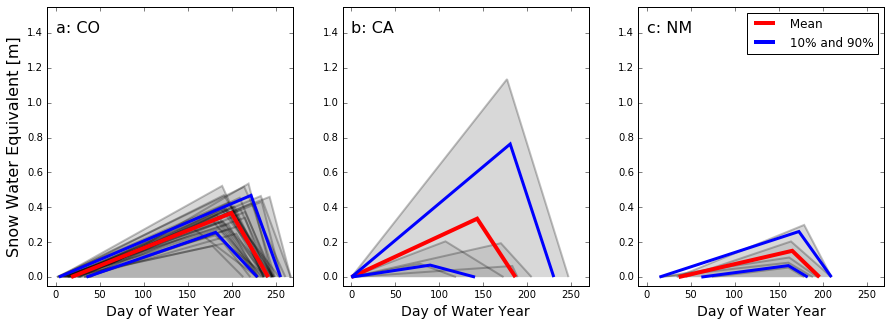

In [12]:
plt.figure(figsize=(15,5))

ax1 = plt.subplot(1,3,1)
generate_swe_triangles(nwt,ax1,'-','Niwot Ridge')
ax2 = plt.subplot(1,3,2)
generate_swe_triangles(p301,ax2,'-','P301')
ax3 = plt.subplot(1,3,3)
generate_swe_triangles(vcm,ax3,'-','')
axes = [ax1,ax2,ax3]
titles = ['a: CO','b: CA','c: NM']
for ax,tle in zip(axes,titles) :
    ax.set_xlim(-10,270)
    ax.set_ylim(-.05,1.55)
    ax.set_xlabel('Day of Water Year', fontsize = 14)
    ax.text(0,1.4,tle, fontsize=16)
    
ax1.set_ylabel('Snow Water Equivalent [m]', fontsize = 16)
ax3.legend(loc='best')
plt.savefig('./figures/swe_trianle_comparison.png', dpi=300, bbox_inches='tight')
plt.savefig('./figures/swe_trianle_comparison.pdf', bbox_inches='tight')

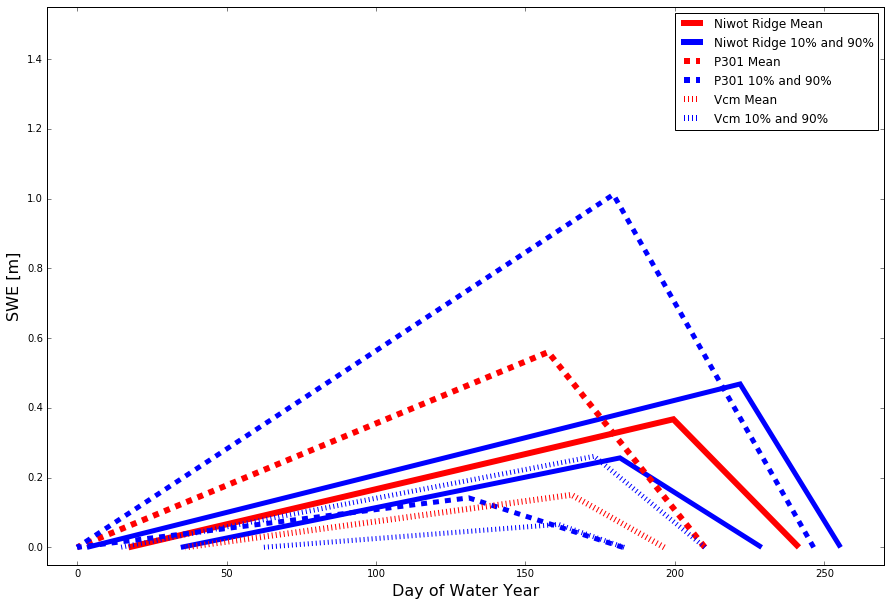

In [12]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

generate_swe_triangles(nwt,ax,'-','Niwot Ridge')
generate_swe_triangles(p301,ax,'--','P301')
generate_swe_triangles(vcm,ax,':','Vcm')

ax.set_xlim(-10,270)
ax.set_ylim(-.05,1.55)
plt.xlabel('Day of Water Year', fontsize = 16)
plt.ylabel('SWE [m]', fontsize=16)
plt.legend()